# ネットワーク頑健性

In [102]:
import numpy as np
import pandas as pd
import networkx as nx
import copy
import random
from collections import defaultdict

import matplotlib.pyplot as plt

## Collective Influenceを計算する関数を定義

In [114]:
def collective_influence(G, l):
    deg = np.array([d for n, d in G.degree()])
    dist = nx.floyd_warshall_numpy(G)

    nodes = list(G.nodes())
    ci = defaultdict()
    for i in range(len(G.nodes())):
        idx = np.where(dist[i] == l)[0]
        # ci.append((deg[i] - 1) + np.sum(deg[idx] - 1))
        ci[nodes[i]] = (deg[i] - 1) + np.sum(deg[idx] - 1)

    return ci


In [64]:
n=1000
# print('Creating powerlaw cluster with %d Nodes.' % n)
# gamma=2.1

# w = nx.utils.powerlaw_sequence(n, gamma)
# G = nx.expected_degree_graph(w)
# Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
# G = G.subgraph(Gcc[0])

G = nx.powerlaw_cluster_graph(n, 4, 0.1)

largest_component_size_0 = len(max(nx.connected_components(G), key=len))


## ランダム攻撃


In [134]:
g_err = G.copy()
g_err = nx.Graph(g_err)
data_err = [1]


# while nx.is_connected(g_err):
for i in range(n-1):
    node = random.choice(list(g_err.nodes()))
    g_err.remove_node(node)

    giant = len(max(nx.connected_components(g_err), key=len))
    data_err.append(giant/largest_component_size_0)




## 次数に基づく標的型攻撃

In [135]:
g_err = G.copy()
g_err = nx.Graph(g_err)
data_err_deg = [1]

ranks = nx.degree_centrality(g_err)
nodes = sorted(g_err.nodes(), key=lambda n: ranks[n])
# while nx.is_connected(g_err):
for i in range(n-1):
    g_err.remove_node(nodes.pop())

    giant = len(max(nx.connected_components(g_err), key=len))
    data_err_deg.append(giant/largest_component_size_0)

## PageRankに基づく標的型攻撃

In [136]:
g_err = G.copy()
g_err = nx.Graph(g_err)
data_err_page = [1]

ranks = nx.pagerank_numpy(g_err)
nodes = sorted(g_err.nodes(), key=lambda n: ranks[n])
# while nx.is_connected(g_err):
for i in range(n-1):

    g_err.remove_node(nodes.pop())

    giant = len(max(nx.connected_components(g_err), key=len))
    data_err_page.append(giant/largest_component_size_0)

## Betweennessに基づく標的型攻撃

In [137]:
g_err = G.copy()
g_err = nx.Graph(g_err)
data_att_bet = [1]

ranks = nx.betweenness_centrality(g_err, normalized=True)
nodes = sorted(g_err.nodes(), key=lambda n: ranks[n])
# while nx.is_connected(g_err):
for i in range(n-1):

    g_err.remove_node(nodes.pop())

    giant = len(max(nx.connected_components(g_err), key=len))
    data_att_bet.append(giant/largest_component_size_0)

## Collective Influenceに基づく標的型攻撃

In [138]:
g_err = G.copy()
g_err = nx.Graph(g_err)
data_att_ci = [1]

ranks = collective_influence(g_err, 3)
nodes = sorted(g_err.nodes(), key=lambda n: ranks[n])

while nx.is_connected(g_err):
    g_err.remove_node(nodes.pop())

    giant = len(max(nx.connected_components(g_err), key=len))
    data_att_ci.append(giant/largest_component_size_0)

### 結果の表示

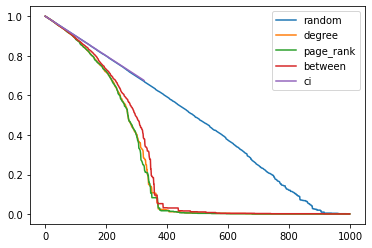

In [142]:
plt.plot(data_err, label="random")
plt.plot(data_err_deg, label="degree")
plt.plot(data_err_page, label="page_rank")
plt.plot(data_att_bet, label="between")
plt.plot(data_att_ci, label="ci")
plt.legend()